In [1]:
import django, sys, os
sys.path.append('/home/galm/software/django/tmv/BasicBrowser')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()
from pandas_ods_reader import read_ods
import pandas as pd
from scoping.models import *
import random
import matplotlib.pyplot as plt

In [2]:
p = Project.objects.get(pk=178)

scopus_qs = Query.objects.filter(database="scopus", project=p, id__gte=8558)
scopus_qs.count()

25

In [3]:
dids = set(Doc.objects.filter(query__in=scopus_qs).values_list('pk', flat=True))
len(dids)

476778

In [4]:
q, created = Query.objects.get_or_create(
    title="Scopus all", project=p, database="intern", creator=User.objects.get(pk=1)
)
if created:
    q.doc_set.clear()
    T = Doc.query.through
    qds = [T(doc_id=d, query=q) for d in dids]

    T.objects.bulk_create(qds)
    q.r_count = len(dids)

    q.save()
q.id

8696

In [15]:
tag, created = Tag.objects.get_or_create(
    title="sample_1", text="all", query=q
)
if created:
    T = Doc.tag.through
    dts = [T(doc_id=d, tag=tag) for d in random.sample(dids,50)]
    T.objects.bulk_create(dts)
    tag.update_tag()

In [5]:
dpy = pd.DataFrame.from_dict(q.doc_set.values('id','PY'))
dpy.head()

,id,PY
0,1049622,2018.0
1,1046,2010.0
2,1049624,2018.0
3,1048,2013.0
4,2097152,2019.0


In [6]:
dpy.groupby('PY')['PY'].size()

PY
1984.0        1
1985.0     1295
1986.0     1182
1987.0     1327
1988.0     1437
1989.0     1687
1990.0     1940
1991.0     2335
1992.0     2319
1993.0     2761
1994.0     2631
1995.0     3170
1996.0     3579
1997.0     4159
1998.0     4655
1999.0     5198
2000.0     5181
2001.0     5728
2002.0     6414
2003.0     8323
2004.0     9052
2005.0    10152
2006.0    11122
2007.0    13094
2008.0    15230
2009.0    15146
2010.0    18437
2011.0    21723
2012.0    24999
2013.0    26817
2014.0    28272
2015.0    31195
2016.0    33296
2017.0    34858
2018.0    39049
2019.0    43568
2020.0    32929
2021.0       11
Name: PY, dtype: int64

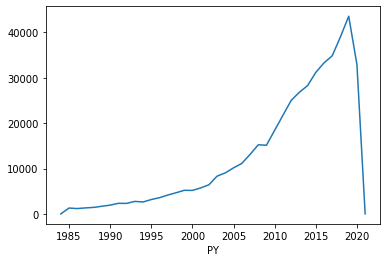

In [7]:
fig, ax = plt.subplots()
dpy.groupby('PY')['PY'].size().plot()

In [11]:
p = Project.objects.get(pk=178)

wos_qs = Query.objects.filter(database="WoS", project=p, id__gte=7368)
wos_qs.count()
wos_qs

<QuerySet [<Query: wos_broad_2>, <Query: wos broad>, <Query: wos_broad_migration>, <Query: wos_update_presubmission>, <Query: wos_broad_3_updated>]>

In [12]:
wos_dids = set(Doc.objects.filter(query__in=wos_qs).values_list('pk', flat=True))
len(wos_dids)

411194

In [13]:
len(wos_dids | dids)

610098